# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS17

# Assignment 7: Ordinary Differential Equations 2

#### Team members : Vajra Ganeshkumar, Jeeveswaran Kishaan <br>

As part of your preparation for the midterm, look into how you can use Python to write clean/efficient code.
For example: https://www.youtube.com/watch?v=OSGv2VnC0go

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize, getfigs
import IPython
import pylab

## Population dynamics [60 points]

### Introduction

The following section is an excerpt from *Fundamentals of Differential Equations 8th Ed.* by Nagle, Saff, and Snider.

"A mathematical model for the population dynamics of competing species, one a predator with
population $x_2(t)$ and the other its prey with population $x_1(t)$ , was developed independently in the
early 1900s by A. J. Lotka and V. Volterra. It assumes that there is plenty of food available for the
prey to eat, so the birthrate of the prey should follow the Malthusian or exponential law (see Section 3.2); that is, the birthrate of the prey is $Ax_1$ , where $A$ is a positive constant. The death rate of
the prey depends on the number of interactions between the predators and the prey. This is modeled by the expression $Bx_1x_2$ , where $B$ is a positive constant. Therefore, the rate of change in the
population of the prey per unit time is $\frac{dx_1}{dt} = Ax_1 - Bx_1x_2$ . Assuming that the predators
depend entirely on the prey for their food, it is argued that the birthrate of the predators depends
on the number of interactions with the prey; that is, the birthrate of predators is $Dx_1x_2$ , where $D$ is
a positive constant. The death rate of the predators is assumed to be $Cx_2$ because without food the
population would die off at a rate proportional to the population present. Hence, the rate of
change in the population of predators per unit time is $\frac{dx_2}{dt} = -Cx_2 + Dx_1x_2$ . Combining these
two equations, we obtain the Volterra–Lotka system for the population dynamics of two competing species:

\begin{align*}
    x_1' = Ax_1 - Bx_1x_2 &\quad\quad(1) \\
    x_2' = -Cx_2 + Dx_1x_2  &\quad\quad(2)
\end{align*}

Such systems are in general not explicitly solvable."

What is described here is the modelling of population dynamics using a system of non-linear first-order differential equations. The equations of the form shown above are also called Lotka–Volterra equations or predator-prey equations; (1) is the equation for the rate of change of the prey population and (2) is the equation for the rate of change of the predator population.

In this exercise, your task is to solve this system using RK4.

### Jedi vs. Inquisitors

After the Clone Wars in the Star Wars universe, [Emperor Palpatine](http://starwars.wikia.com/wiki/Palpatine) has set up a network of [inquisitors](http://starwars.wikia.com/wiki/Inquisitorius), whose sole purpose is hunting down and killing any remaining [Jedi](http://starwars.wikia.com/wiki/Jedi) in the galaxy; this is examined in the [Star Wars Rebels](https://en.wikipedia.org/wiki/Star_Wars_Rebels) TV series. The inquisitors are managed by [Darth Vader](http://starwars.wikia.com/wiki/Anakin_Skywalker), who is quite unforgiving if the inquisitors are not doing their job properly (i.e. he imprisons and/or kills them); this means that if the inquisitors want to survive, they have to keep hunting the Jedi.

For the purpose of this problem, we will take the Jedi to represent the prey (this is not strictly true because the Jedi are more than capable of looking after themselves, but we will ignore that aspect in this problem) and the inquisitors to represent the predators, so the population dynamics of the Jedi and the inquisitors can be modelled using equations (1) and (2).

### RK4 for solving systems of equations [20 points]

In the last assignment, you investigated RK4 for solving a single equation, but we now need to extend the set of equations so that we can use the method for solving systems.

Your first task for today is thus writing down the set of equations that RK4 will use for estimating the solution to a system of two equations, namely a system of the form

\begin{align*}
    x_1' &= f(t, x_1, x_2) \\
    x_2' &= g(t, x_1, x_2)
\end{align*}

such that, given a time step $h$, we know that

\begin{equation*}
    t_{n+1} = t_n + h
\end{equation*}

### Answer ###
**Runge Kutta Method for solving system of equations** <br>

Assuming,

$x_1 = y(t)$ <br>
$x_2 = z(t)$ <br>
$x_1' = \frac{dy}{dt}$<br>
$x_2' = \frac{dz}{dt}$

Let the first order ordinary differential equations be:

$$\frac{\mathrm{d}y }{\mathrm{d} t} = f(t,y(t),z(t))$$ <br>
<br>
$$\frac{\mathrm{d}z }{\mathrm{d} t} = g(t,y(t),z(t))$$

4th order Runge-Kutta formulas for a system of 2 ODE's are:

$$ y_{i+1} = y_i + \frac{1}{6}(a_0+2a_1+2a_2+a_3) $$
$$ z_{i+1} = z_i + \frac{1}{6}(b_0+2b_1+2b_2+b_3) $$

where h is the step size,

* $a_0 = h\cdot f(t_i,y(t)_i,z(t)_i)$ <br>
* $b_0 = h\cdot g(t_i,y(t)_i,z(t)_i)$ <br>

* $a_1 = h\cdot f(t_i+\frac{h}{2},y_i+\frac{a_0}{2},z_i+\frac{b_0}{2})$<br>
* $b_1 = h\cdot g(t_i+\frac{h}{2},y_i+\frac{a_0}{2},z_i+\frac{b_0}{2})$<br>

* $a_2 = h\cdot f(t_i+\frac{h}{2},y_i+\frac{a_1}{2},z_i+\frac{b_1}{2})$<br> 
* $b_2 = h\cdot g(t_i+\frac{h}{2},y_i+\frac{a_1}{2},z_i+\frac{b_1}{2})$<br>

* $a_3 = h\cdot f(t_i+h,y_i+a_2,z_i+b_2)$<br>
* $b_3 = h\cdot g(t_i+h,y_i+a_2,z_i+b_2)$<br>

And this can be simplified as 

$a = \frac{1}{6} (a_0 + 2a_1 + 2a_2 + a_3)$ <br>

$b = \frac{1}{6} (b_0 + 2b_1 + 2b_2 + b_3)$

So therefore,<br>
$x_{i+1} = x_i + h$ <br>
$y_{i+1} = y_i + a$ <br>
$z_{i+1} = z_i + b$ 

i.e,<br>
$t_{i+1} = t_i + h$ <br>
$x_{1(i+1)}' = y_i + a$ <br>
$x_{2(i+1)}' = z_i + b$ 

### Reference###
* https://www.nsc.liu.se/~boein/f77to90/rk.html

* https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od

### Implementation [40 points]

Now that you have the set of equations, implement RK4 for solving the Jedi vs. Inquisitor problem. Use $A = 10.0$, $B = 7.0$, $C = 3.0$, and $D = 5.0$ for the system constants and assume that the initial populations of the Jedi and inquisitors are $60$ and $25$ respectively. Using a step size $h = 0.01$, run the Runge-Kutta solver for at least 200 iterations and then plot the resulting population curves over time  (assuming that time is represented in years). Your solution should look similar to the one shown below.

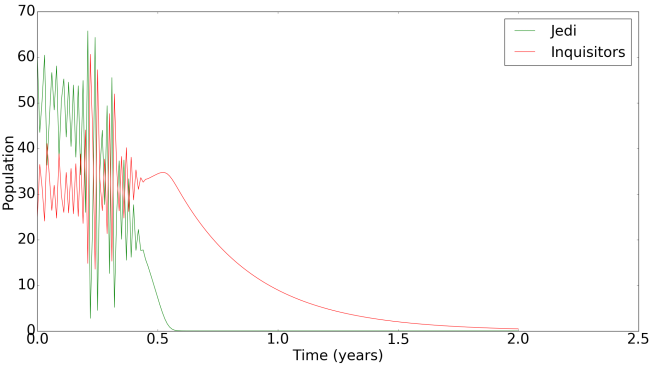

In [2]:
IPython.core.display.Image("images/predator_prey_example.png", embed=True)

In [3]:
### Given Data ###
A = 10.0
B = 7.0
C = 3.0
D = 5.0
h = 0.01
t = 0.0
#initial values
x_1 = 60    #jedi
x_2 = 25    #inquistors

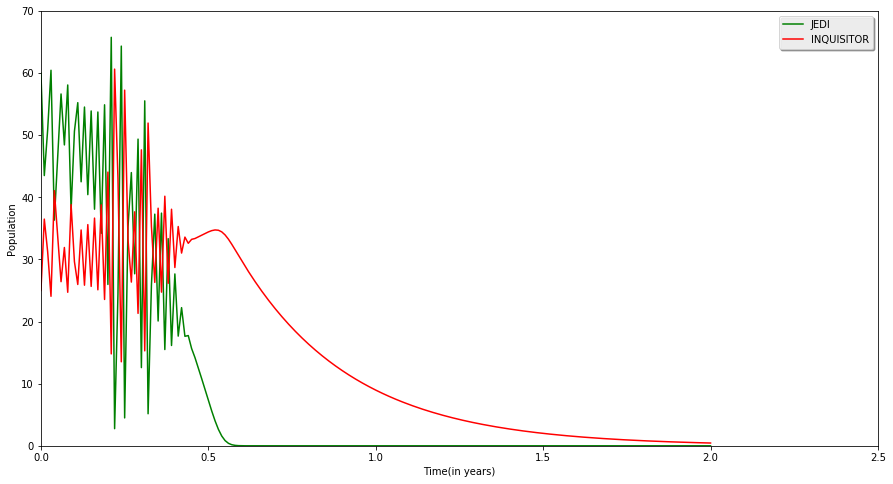

In [4]:
def f(x_1, x_2,A,B):
    return A*x_1 - B*x_1*x_2

def g(x_1,x_2,C,D):
    return -C*x_2 + D*x_1*x_2

def rk4(f,g,initial,x_1,x_2,h,n):
    prey_initial = initial[1]
    predator_initial = initial[2]
    t = initial[0]
    
    # initializing a list
    prey_current_list = [prey_initial]
    predator_current_list = [predator_initial]
    t_current = [t] 
    
    
    # initializing a counter to count the number of iterations
    no_iterations = 0
    
    while no_iterations < n :
        a0 = h * f(prey_initial,predator_initial,A,B)
        b0 = h * g(prey_initial,predator_initial,C,D)
        a1 = h * f(prey_initial + (a0/2),predator_initial+(b0/2),A,B)
        b1 = h * g(prey_initial + (a0/2),predator_initial+(b0/2),C,D)
        a2 = h * f(prey_initial + (a1/2),predator_initial+(b1/2),A,B)
        b2 = h * g(prey_initial + (a1/2),predator_initial+(b1/2),C,D)
        a3 = h * f(prey_initial + a2, predator_initial + b2,A,B)
        b3 = h * g(prey_initial + a2, predator_initial + b2,C,D)
        
        t +=h
        prey_initial  += (a0+(2*a1)+(2*a2)+a3)/6
        predator_initial += (b0+(2*b1)+(2*b2)+b3)/6
        t_current.append(t)
        prey_current_list.append(prey_initial)
        predator_current_list.append(predator_initial)
        no_iterations += 1
        
    return prey_current_list, predator_current_list,t_current, no_iterations 

initial= np.array([t,x_1,x_2])
h = 0.01
n = 200
v = rk4(f,g,initial,x_1,x_2,h,n)
time = v[2]
prey = v[0]
predator = v[1]

plt.figure(figsize=(15,8))
plt.plot(v[2],v[0],color = 'g')
plt.plot(v[2],v[1],color = 'r')
pylab.xlim([0,2.5])
pylab.ylim([0,70])
plt.xlabel("Time(in years)")
plt.ylabel("Population")
plt.legend(('JEDI', 'INQUISITOR'), shadow=True)
plt.show()

## Representing higher order ODEs as systems of ODEs [20 points]

Represent the following equation as a system of first order ODEs; you don't need to solve the system.

\begin{equation*}
    y^{(3)} + 3y'' - y' - 12y - 10 = 0
\end{equation*}

### Answer ###
The General solution to this problem is of the form

By taking the substitution $z_1(t) = y(t)$,<br>
we now have <br>

$z_1' = y' = z_2$<br>
$z_2'= y'' = z_3 $ <br>
$z_3' = y''' = y^{(3)} $<br>
$  \hspace{2cm}   = -3y'' + y' + 12y + 10 $<br>
$  \hspace{2cm}   = -3z_3 + z_2 + 12z_1 + 10 $<br>

<br>
We can re-write the given equation as $$ z_3'= -3z_3 + z_2 + 12z_1+10$$

The set of equations to be converted in to a system of first order equations are;

$$z_1' = z_2$$
$$z_2' = z_3 $$ 
$$ z_3' = -3z_3 + z_2 + 12z_1+10$$

Now, making these equations as a set of first-order ODEs, we get

\begin{equation*}
    \frac{d}{dt}\begin{pmatrix} z_1 \\ z_2 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 12 & 1 & -3 \end{pmatrix} \begin{pmatrix} z_1 \\ z_2 \\ z_3 \end{pmatrix} +  \begin{pmatrix} 0 \\ 0 \\ 10 \end{pmatrix}
\end{equation*}

####  Reference : Lab Class Solutions (MRC_LabClassExercises07_solutions.ipynb)